## 1: LOAD


In [1]:
# Reading the json data from the file
import json
data = []
with open('transactions.txt') as json_file:
    for json_obj in json_file:
        data.append(json.loads(json_obj))


In [2]:
from IPython.display import display

In [3]:
# Converting json object into a pandas dataframe
import pandas as pd
df = pd.DataFrame.from_records(data)

# Sample 10 records from the data
df.sample(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
550100,881417713,881417713,15000.0,15000.00,2016-12-10T19:48:46,223.09,gap.com,US,US,05,...,False,,0.00,,,,False,,,False
107183,513829169,513829169,250.0,218.99,2016-04-11T02:37:40,171.30,Universe Massage #511290,US,US,90,...,False,,31.01,,,,True,,,False
290867,719873381,719873381,2500.0,1574.87,2016-02-16T16:17:36,0.00,Domino's Pizza #409031,US,US,05,...,False,,925.13,,,,False,,,False
557296,902454138,902454138,7500.0,6852.78,2016-11-04T16:12:34,138.42,Mobile eCards,US,US,09,...,False,,647.22,,,,False,,,False
455506,263347919,263347919,20000.0,1804.95,2016-03-29T03:59:59,72.89,Boston Cafe #465229,US,US,02,...,False,,18195.05,,,,True,,,False
162377,791293920,791293920,10000.0,7937.62,2016-02-25T15:27:41,7.96,Pizza Hut #126119,US,US,09,...,False,,2062.38,,,,True,,,False
42094,918205645,918205645,500.0,197.51,2016-05-11T21:01:01,54.90,KFC #765212,US,US,09,...,False,,302.49,,,,True,,,False
543395,360137532,360137532,15000.0,7218.45,2016-09-06T12:32:32,233.19,Next Day Online Services,US,US,02,...,False,,7781.55,,,,False,,,False
9656,543046230,543046230,15000.0,14824.08,2016-04-28T11:45:16,9.79,netflix.com,US,US,05,...,False,,175.92,,,,False,,,False
393573,711990261,711990261,1000.0,829.89,2016-01-10T14:11:22,0.00,Fresh eCards,US,US,02,...,False,,170.11,,,,False,,,False


In [4]:
# the number of fields and the number of records in the data
print("The number of fields in the given data is :", df.shape[1])
print("The number of records in the given data is :",df.shape[0])

The number of fields in the given data is : 29
The number of records in the given data is : 641914


In [5]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch'],
      dtype='object')

In [6]:
# The summary statistics of numerical variables in the data
df_numerical = df[['creditLimit','availableMoney','transactionAmount','currentBalance']]
df_numerical.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,10697.210608,6652.828573,135.162497,4044.382035
std,11460.359133,9227.132275,147.053302,5945.510224
min,250.000000,-1244.930000,0.000000,0.000000
25%,5000.000000,1114.970000,32.320000,502.442500
50%,7500.000000,3578.165000,85.800000,2151.860000
75%,15000.000000,8169.185000,189.030000,5005.890000
max,50000.000000,50000.000000,1825.250000,47496.500000


In [7]:
# The summary statistics of categorical variables in the data
df.columns.difference(['b'])
df_categorical = df[df.columns.difference(['creditLimit','availableMoney','transactionAmount','currentBalance'])]
df_categorical.describe(include='all')



,accountNumber,accountOpenDate,acqCountry,cardCVV,cardLast4Digits,cardPresent,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,...,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionDateTime,transactionType
count,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,...,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914
unique,5000,1826,5,899,5134,2,165,5000,2186,1,...,5,2493,1,1,4,6,1,1,635472,4
top,318001076,2015-12-11,US,633,1789,False,05/2026,318001076,2016-07-20,,...,US,Lyft,,,01,05,,,2016-07-19T13:03:15,PURCHASE
freq,10034,10137,632303,11354,10034,340453,4209,10034,3948,641914,...,635577,25311,641914,641914,514144,255615,641914,641914,3,608685


The Categorical Variables echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd have no values at all

## 2: PLOT

Statictics for the transaction amount in the given data
count    641914.000000
mean        135.162497
std         147.053302
min           0.000000
25%          32.320000
50%          85.800000
75%         189.030000
max        1825.250000
Name: transactionAmount, dtype: float64


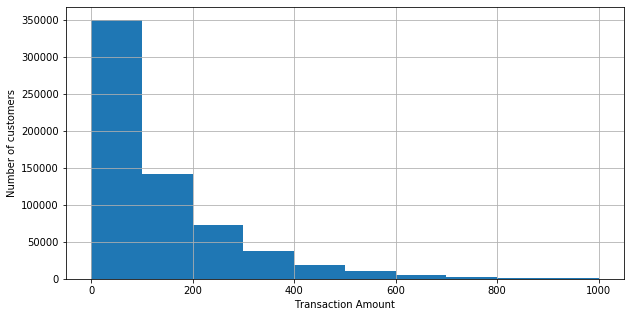

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot the histogram of processed amounts
plt.figure(figsize=(10,5))
hist1 = df['transactionAmount'].hist(range=[0,1000])
hist1.set_xlabel('Transaction Amount')
hist1.set_ylabel('Number of customers')
print('Statictics for the transaction amount in the given data')
print(df['transactionAmount'].describe())


75% of the transactions made by the customers are less than 189$. The credit card is being used majorly for small transactions. There is a downward trend in the number of customers as the transaction amount increases.

The statistics for the transaction amount is:
 count    5.000000e+03
mean     1.735254e+04
std      4.973709e+04
min      0.000000e+00
25%      1.897335e+03
50%      5.295595e+03
75%      1.436336e+04
max      1.457471e+06
dtype: float64


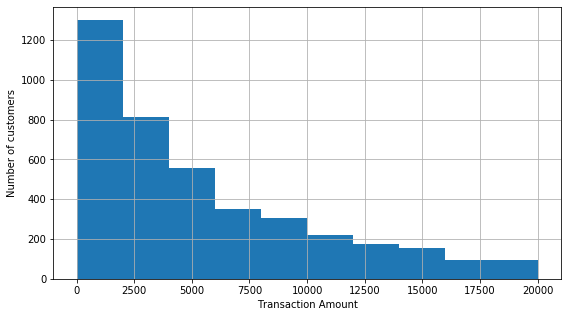

In [9]:
# grouping the transaction amount by each customer
import matplotlib.pyplot as plt
transactionAmt = df.groupby(['customerId']).sum()['transactionAmount'].values
creditLimit = df.groupby(['customerId'])['creditLimit'].first().values

minAmt = int(min(transactionAmt))
maxAmt = int(max(transactionAmt))


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
hist1 = pd.Series(transactionAmt).hist(range=[minAmt,20000])
# for axis in hist1.flatten():
hist1.set_xlabel('Transaction Amount')
hist1.set_ylabel('Number of customers')

# plt.subplot(1,2,2)
# hist2 = pd.Series(creditLimit).hist(range=[minAmt,20000])

print('The statistics for the transaction amount is:\n',pd.Series(transactionAmt).describe())

The above plot shows the histogram of the total processed amount by each customer. There is a downward trend in the transaction amount by customers. As the amount increases, the number of customers making a total transaction of that amount are decreasing.

## 3: Data Wrangling - Duplicate Transactions

In [10]:
import numpy as np
def identify_reverse_transactions(df):
    df['currentBalanceDiff'] = df['currentBalance'].diff()
    index = df[df['currentBalanceDiff']<0].index
    thirdTransaction = df.loc[index].reset_index(drop=True)
    index = index - 1
    secondTransaction = df.loc[index].reset_index(drop=True)
    index = index - 1
    firstTransaction = df.loc[index].reset_index(drop=True)
    return secondTransaction.where((firstTransaction['merchantName']==secondTransaction['merchantName'])&(thirdTransaction['currentBalanceDiff']==-1*secondTransaction['currentBalanceDiff'])).dropna()


df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])


reversedTransactions = identify_reverse_transactions(df)
reversedTransactions.to_csv('ReversedTransactions.txt',sep='\t')
print("The total number of reversed transaction is :",reversedTransactions.shape[0])
print("The total amount estimated for the reversed transaction is :",reversedTransactions['transactionAmount'].sum())
# &((secondTransaction['transactionDateTime']-firstTransaction['transactionDateTime'])/np.timedelta64(1,'s')<180)

The total number of reversed transaction is : 4664
The total amount estimated for the reversed transaction is : 625698.93


To get all the reversed transactions,firstly, the difference in the currentBalance of that row and the previous row is obtained. The general trend in the currentBalance is that the balance should increase with the customer doing the transaction.But when the transaction is reversed the currentBalance will decrease because the money is creditted back to the account. So the difference between the current row balance and the previous row balance will be negative. So all such rows are retrieved, but the difference will be negative only after the  reverse transaction is completed that is in the next row where the currentBalance is updated. So the previous two rows are taken and where the reverse transaction actually happened. The merchant''s name is validated and if they are the same and the currentBalanceDiff after the first transaction and second transaction is the same but negative to each other, then the transaction is a reversed transaction.

In [11]:
def identify_multiswipe_transactions(df):
    df['currentBalanceDiff'] = df['currentBalance'].diff()
    df['transactionAmountDiff'] = df['transactionAmount'].diff()
    index = df[df['transactionAmountDiff']==0].index
    secondTransaction = df.loc[index].reset_index(drop=True)
    index = index-1
    firstTransaction = df.loc[index].reset_index(drop=True)
    index = index+2
    thirdTransaction = df.loc[index].reset_index(drop=True)
    return firstTransaction,secondTransaction,thirdTransaction

one, two, three = identify_multiswipe_transactions(df)
multiswipe = two.where((one['merchantName']==two['merchantName'])&(three['currentBalance']>two['currentBalance'])&((two['transactionDateTime']-one['transactionDateTime'])//np.timedelta64(1,'s')<120)).dropna()
multiswipe.to_csv('MultiSwipeTransactions.txt',sep='\t')

print("The total number of multiswipe transactions is :",multiswipe.shape[0])
print("The total amount estimated for the multiswipe transaction is :",multiswipe['transactionAmount'].sum())

The total number of multiswipe transactions is : 3608
The total amount estimated for the multiswipe transaction is : 510301.72


 In this scenario, the transaction happening accidentally and the vendor charges the customer''s card multiple times within a short period of time. To retrieve such a scenario, the difference in the transaction amount within the same column is taken with the help of a diff function. The row where the difference is zero is considered, because the amount in the above transaction will also be the same due of the multi swipe scenario. The merchants of the previous row and the current row is validated to be the same or not. Also the time stamp between the first and second should be very less. I have taken it to be within 2 minutes. A one more condition needs to be satisfied. The currentBalance after the multi swipe should be greater than the currentbalance of the last before transaction, otherwise it might be a case of a reverse transaction. 

## 4: Model

In [12]:
#droppping columns that were used for second and third question
df = df.drop("transactionAmountDiff", axis=1)
df = df.drop("currentBalanceDiff", axis=1)

In [13]:
#dropping all these columns as they do not have any data in them
# df = df.drop('echoBuffer',axis =1)
# df = df.drop('merchantCity',axis =1)
# df = df.drop('merchantState',axis =1)
# df = df.drop('merchantZip',axis =1)
# df = df.drop('posOnPremises',axis =1)
# df = df.drop('recurringAuthInd',axis =1)

Text(0, 0.5, 'count')

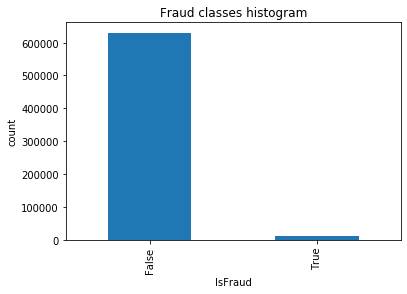

In [14]:
pd.value_counts(df['isFraud']).plot.bar()
plt.title('Fraud classes histogram')
plt.xlabel('IsFraud')
plt.ylabel('count')

In [15]:
# Label Encoding the categorical variables
from sklearn import preprocessing
le_array = []

categorical_columns = ['merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']
# categorical_columns = ['merchantName','posEntryMode','posConditionCode','cardPresent']

for i in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])
    le_array.append(le)

categorical_data = df[categorical_columns]


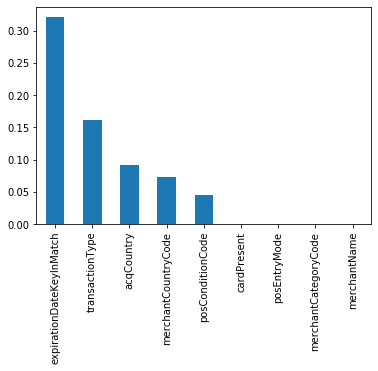

In [16]:
# Appyling chi-square test on the categorical variables. More the p-value, more independent from the target variable, so categorical 
# variables with large p-values can be ignored.

from sklearn.feature_selection import chi2
chi_scores = chi2(categorical_data,df['isFraud'])
p_values = pd.Series(chi_scores[1],index = categorical_columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

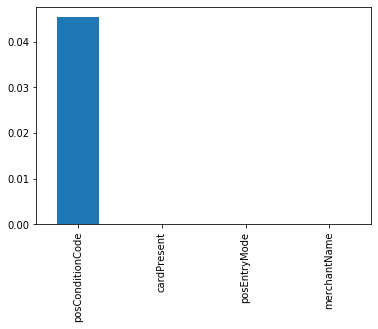

In [17]:
categorical_columns = ['merchantName','posEntryMode','posConditionCode','cardPresent']
categorical_data = df[categorical_columns]

chi_scores = chi2(categorical_data,df['isFraud'])
p_values = pd.Series(chi_scores[1],index = categorical_columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [18]:
df['accountOpenDays'] = (pd.datetime.now()-pd.to_datetime(df['accountOpenDate'])).dt.days
df['addressChangedBeforeDays'] =  (pd.datetime.now()-pd.to_datetime(df['dateOfLastAddressChange'])).dt.days
df['cardExpiryDays'] = abs((pd.to_datetime(df['dateOfLastAddressChange'])-(pd.datetime.now())).dt.days)


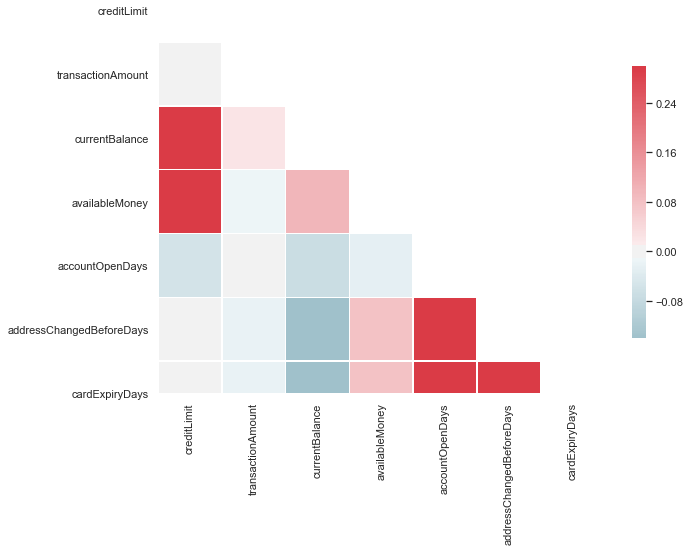

In [19]:
# Correlation between the numerical variables in the data
import seaborn as sns
sns.set(style="white")
numerical_columns = ['creditLimit','transactionAmount','currentBalance','availableMoney','accountOpenDays','addressChangedBeforeDays','cardExpiryDays']

df_corr = df[numerical_columns] 
corr = df_corr.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


From the above correlation map, it is obvious that the credLimit is highly correlated with availableMoney and currentBalance.
So we can use one of those in our features and ignore the other two. We can also see that the cardExpiryDays, addressChangedBeforeDays and accountOpenDays are strongly correlated. 

In [20]:
# the three variables which were correlated are reduced into one variable which is the percentage of available money
df['availableMoneyRatio'] = df['availableMoney']/df['creditLimit']

# the three variables which were related to account opening, address changed after opening and the card expiry is being reduced
# to one varibale and calculating the account activity with respect to address change. 
df['accountActiveRatio'] = (df['cardExpiryDays']-df['addressChangedBeforeDays'])/df['accountOpenDays']


In [21]:
# Comparing the number of fraudulant transactions when the cvv was entered incorrectly 
df[~(df['cardCVV']==df['enteredCVV'])]['isFraud'].value_counts()

False    5742
True      195
Name: isFraud, dtype: int64

The number of incorrect CVV entered has been most in the case of a non fraudulant transaction than a fraudulant one. 

In [22]:
from sklearn import preprocessing

# columns = ['creditLimit','availableMoney','transactionAmount','merchantName','currentBalance','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']
numerical_columns = ['availableMoneyRatio','transactionAmount','accountActiveRatio']

# df = df[numerical_columns]
for i in numerical_columns:
    df[i]=(df[i]-df[i].mean())/df[i].std()


In [23]:
df_fraud = df[df['isFraud']==True]
df_non_fraud = df[df['isFraud']==False]
print("The number of Fraud Transactions is :", df_fraud.shape[0])
print("The number of Non-Fraud Transactions is :", df_non_fraud.shape[0])

The number of Fraud Transactions is : 11302
The number of Non-Fraud Transactions is : 630612


In [24]:
#undersampling the Non-Fraud Transactions
df_non_fraud = df_non_fraud.sample(14000,random_state=4)
df_data = pd.concat([df_fraud,df_non_fraud],axis = 0)
df_data.isFraud = df_data.isFraud.astype(int)

In [25]:
categorical_sample = df_data[categorical_columns]
finalData = pd.concat([df_data[numerical_columns],categorical_sample],axis = 1)

In [26]:
# without oversampling 
from sklearn.model_selection import train_test_split
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(finalData,df_data.isFraud,test_size=0.2,random_state=10)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.3,max_depth=3, random_state=0).fit(Xtrain1, ytrain1)
pred = clf1.predict(Xtest1)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(ytest1,pred))
print(confusion_matrix(ytest1,pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2810
           1       0.69      0.66      0.68      2251

    accuracy                           0.72      5061
   macro avg       0.72      0.71      0.71      5061
weighted avg       0.72      0.72      0.72      5061

[[2159  651]
 [ 771 1480]]


In [29]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE,ADASYN

df1 = pd.concat([df[numerical_columns],df[categorical_columns]],axis = 1)
X_resampled, y_resampled = SMOTE().fit_resample(df1,df.isFraud)
y_resampled = y_resampled.astype(int)

In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=10)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.3,max_depth=3, random_state=0).fit(Xtrain, ytrain)
pred = clf.predict(Xtest)
pred_prob = clf.predict_proba(Xtest)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85    125964
           1       0.85      0.84      0.84    126281

    accuracy                           0.85    252245
   macro avg       0.85      0.85      0.85    252245
weighted avg       0.85      0.85      0.85    252245



In [42]:
#confusion matrix
cm = confusion_matrix(ytest,pred)
print(cm)

[[107695  18269]
 [ 20764 105517]]


In [33]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, pred)

0.8452697728873765

The credit card dataset contains 29 features. The feature engineering was done separately for two types of variables.
    1. Numerical features
    2. Categorical features
1. Numerical - The features which were very useful was the creditLimit and the transactionAmount. The creditLimit, availableBalance and currentBalance were highly correlated to each other. The ratio of the availableBalance and the creditLimit was used as one of the features along with the transactionAmount. 
    The other set of features which were very useful for leanring were accountOpenDays, addressChangedBeforeDays, cardExpiryDays. These three features were also highly correlated and the ratio of the difference between the cardExpiryDays,addressChangedBeforeDays and accountOpenDays was used as a feature.
    All the numerical features were normalized with zero mean and one standard deviation.
    The other features which were not useful was the cardCVV and the enteredCVV. This was because most of the incorrect enteredCVV was present in the transactions which were not fraud.
2. The categorical features importance was calculated by chi square test. It is a test to check the independence of two events. Features needs to be selected which are highly dependent on the target variable. The features merchantName,posEntryMode,posConditionCode,cardPresent were useful in training.

To tackle the imbalanced sets, two things were done.
    1. Undersampling
    2. Oversampling
   
1. The number of transactions which were non-fraudulant was way higher than the fraud transactions. So in order to balance the classes. The number of non fradulant transactions was reduced in size closer to fradulant transactions and the model was built.
2. The dataset was oversampled. SMOTE synthesises new minority instances between existing minority instances.

The model that was used to train the data was the GradientBoostingClassifier. 

I would do the following with more time
1. Try out other models like lightGBM and XGboost.
2. Would have tried out K-Fold cross validation to train on different samples of the data and find the best fit.
3. Would have tried parameter tuning using grid search.
4. Would have tried to learn the data with a neural network.